In [1]:
# ========== Part 1: Dataset Information (Structured 3D) ==========
import numpy as np
import os
import matplotlib.pyplot as plt

# Set data path
data_root = '/Path/to/your/data'  # Modify to your data path

# Load metadata
metadata = np.load(os.path.join(data_root, 'data.npz'), allow_pickle=True)

# Extract information
variables = metadata['variables']
times = metadata['times']
train_groups = metadata['train_groups']
val_groups = metadata['val_groups']
test_groups = metadata['test_groups']
spatial_size = metadata['spatial_size']
coords = metadata['coords']

# Aggregate all cases
all_groups = {
    'train': train_groups.tolist(),
    'val': val_groups.tolist(),
    'test': test_groups.tolist()
}

# Display dataset information
print("=" * 60)
print("Dataset Information Overview (Structured 3D)")
print("=" * 60)
print(f"\nSpatial Resolution: {spatial_size} (X, Y, Z)")

print(f"\nCoordinate Information:")
print(f"  X: Range [{coords[0].min():.4f}, {coords[0].max():.4f}]")
print(f"     Grid points: {spatial_size[0]}")
print(f"     Index range: [0, {spatial_size[0]-1}]")

print(f"\n  Y: Range [{coords[1].min():.4f}, {coords[1].max():.4f}]")
print(f"     Grid points: {spatial_size[1]}")
print(f"     Index range: [0, {spatial_size[1]-1}]")

print(f"\n  Z: Range [{coords[2].min():.4f}, {coords[2].max():.4f}]")
print(f"     Grid points: {spatial_size[2]}")
print(f"     Index range: [0, {spatial_size[2]-1}]")

print(f"\nNumber of Time Steps: {len(times)}")
print(f"Time Steps List: {times[:5]}... (total {len(times)} steps)")

print(f"\nTotal Variables: {len(variables)}")
print("Variable List:")
for i, var in enumerate(variables):
    print(f"  [{i}] {var}")

print(f"\nTotal Cases: {len(train_groups) + len(val_groups) + len(test_groups)}")
print(f"  - Train cases: {len(train_groups)}")
print(f"  - Val cases: {len(val_groups)}")
print(f"  - Test cases: {len(test_groups)}")

print("\nAll Case Names:")
for split, groups in all_groups.items():
    print(f"\n  [{split.upper()}] ({len(groups)} cases):")
    for i, group in enumerate(groups):
        print(f"    [{i}] {group}")

print("\n" + "=" * 60)
print("\nIMPORTANT NOTES FOR SLICING:")
print("  - Choose slice_direction from: 'x', 'y', 'z'")
print("  - Set slice_index to select grid point index")
print("  - Use the index ranges shown above")
print("=" * 60)


Dataset Information Overview (Structured 3D)

Spatial Resolution: [ 64  64 512] (X, Y, Z)

Coordinate Information:
  X: Range [0.0000, 0.0076]
     Grid points: 64
     Index range: [0, 63]

  Y: Range [0.0000, 0.0009]
     Grid points: 64
     Index range: [0, 63]

  Z: Range [0.0000, 0.0009]
     Grid points: 512
     Index range: [0, 511]

Number of Time Steps: 35
Time Steps List: ['0.0000' '0.0002' '0.0004' '0.0006' '0.0008']... (total 35 steps)

Total Variables: 13
Variable List:
  [0] H.npy
  [1] H2.npy
  [2] H2O.npy
  [3] H2O2.npy
  [4] HO2.npy
  [5] O.npy
  [6] O2.npy
  [7] OH.npy
  [8] Ux.npy
  [9] Uy.npy
  [10] Uz.npy
  [11] T.npy
  [12] rho.npy

Total Cases: 7
  - Train cases: 5
  - Val cases: 1
  - Test cases: 1

All Case Names:

  [TRAIN] (5 cases):
    [0] 5atm_u5
    [1] 2atm_u20
    [2] 2atm_u2
    [3] 2atm_u5
    [4] 2atm_u10

  [VAL] (1 cases):
    [0] 5atm_u20

  [TEST] (1 cases):
    [0] 5atm_u10


IMPORTANT NOTES FOR SLICING:
  - Choose slice_direction from: 'x', '

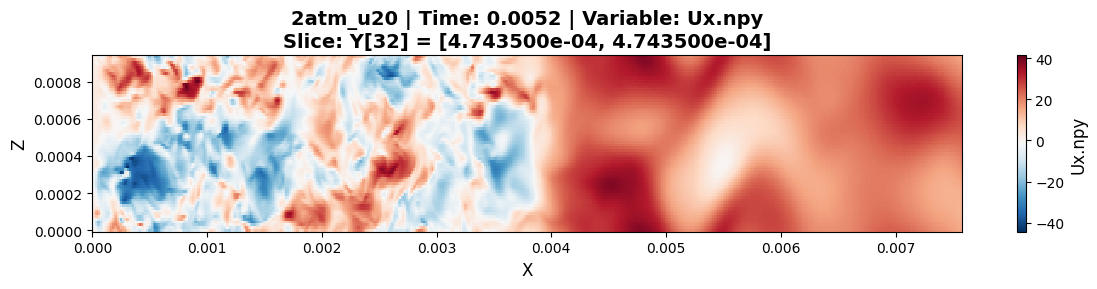


Slice Information:
  Direction: Y
  Slice index: 32 (out of 64 grid points)
  Coordinate value range: [4.743500e-04, 4.743500e-04]

Data Statistics:
  Shape: (64, 512)
  Min: -4.438942e+01
  Max: 4.141228e+01
  Mean: 9.621336e+00
  Std: 1.562196e+01


In [2]:
# ========== Part 2: 修正版 ==========

# -------------------- Configuration Section --------------------
split_name = 'train'
case_idx = 1
time_idx = 26
var_idx = 8

slice_direction = 'y'  # Options: 'x', 'y', 'z'
slice_index = 32       # Index range: X:[0,63], Y:[0,63], Z:[0,511]

figsize = (12, 3)
cmap = 'RdBu_r'
show_colorbar = True
save_fig = False
save_path = './visualization_structured_3d.png'

# ---------------------------------------------------------------

# Load the corresponding case
if split_name == 'train':
    case_name = train_groups[case_idx]
    case_path = os.path.join(data_root, 'train', f'{case_name}.npz')
elif split_name == 'val':
    case_name = val_groups[case_idx]
    case_path = os.path.join(data_root, 'val', f'{case_name}.npz')
elif split_name == 'test':
    case_name = test_groups[case_idx]
    case_path = os.path.join(data_root, 'test', f'{case_name}.npz')
else:
    raise ValueError(f"Invalid split_name: {split_name}")

# Load data
case_data = np.load(case_path)
data = case_data['data']  # shape: (T, C, X, Y, Z)

# Extract data for specified time step and variable
field_data = data[time_idx, var_idx, :, :, :]  # (X, Y, Z) = (64, 64, 512)

# Extract coordinates
Cx = coords[0]  # (64, 64, 512)
Cy = coords[1]  # (64, 64, 512)
Cz = coords[2]  # (64, 64, 512)

# Slice the data based on direction and index
if slice_direction.lower() == 'x':
    if slice_index < 0 or slice_index >= spatial_size[0]:
        raise ValueError(f"slice_index {slice_index} is out of range [0, {spatial_size[0]-1}]")

    # 沿X方向切片，得到Y-Z平面
    slice_data = field_data[slice_index, :, :]  # (Y, Z)
    coord1 = Cy[slice_index, :, :]  # Y coordinates
    coord2 = Cz[slice_index, :, :]  # Z coordinates
    xlabel, ylabel = 'Y', 'Z'
    axis_name = 'X'

    # 获取该切片的真实X坐标范围
    unique_x = np.unique(Cx[slice_index, :, :])
    actual_coord = f"[{unique_x.min():.6e}, {unique_x.max():.6e}]"

elif slice_direction.lower() == 'y':
    if slice_index < 0 or slice_index >= spatial_size[1]:
        raise ValueError(f"slice_index {slice_index} is out of range [0, {spatial_size[1]-1}]")

    # 沿Y方向切片，得到X-Z平面
    slice_data = field_data[:, slice_index, :]  # (X, Z)
    coord1 = Cx[:, slice_index, :]  # X coordinates
    coord2 = Cz[:, slice_index, :]  # Z coordinates
    xlabel, ylabel = 'X', 'Z'
    axis_name = 'Y'

    unique_y = np.unique(Cy[:, slice_index, :])
    actual_coord = f"[{unique_y.min():.6e}, {unique_y.max():.6e}]"

elif slice_direction.lower() == 'z':
    if slice_index < 0 or slice_index >= spatial_size[2]:
        raise ValueError(f"slice_index {slice_index} is out of range [0, {spatial_size[2]-1}]")

    # 沿Z方向切片，得到X-Y平面
    slice_data = field_data[:, :, slice_index]  # (X, Y)
    coord1 = Cx[:, :, slice_index]  # X coordinates
    coord2 = Cy[:, :, slice_index]  # Y coordinates
    xlabel, ylabel = 'X', 'Y'
    axis_name = 'Z'

    unique_z = np.unique(Cz[:, :, slice_index])
    actual_coord = f"[{unique_z.min():.6e}, {unique_z.max():.6e}]"

else:
    raise ValueError(f"Invalid slice_direction: {slice_direction}. Must be 'x', 'y', or 'z'")

# Visualization
fig, ax = plt.subplots(figsize=figsize)

im = ax.pcolormesh(coord1, coord2, slice_data, cmap=cmap, shading='auto')

if show_colorbar:
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(variables[var_idx], fontsize=12)

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_title(f'{case_name} | Time: {times[time_idx]} | Variable: {variables[var_idx]}\n'
             f'Slice: {axis_name}[{slice_index}] = {actual_coord}',
             fontsize=14, fontweight='bold')
# ax.set_aspect('equal')
ax.set_aspect('auto')     # 或者显式设置为auto

plt.tight_layout()

if save_fig:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to: {save_path}")

plt.show()

# Display data statistics
print(f"\nSlice Information:")
print(f"  Direction: {axis_name}")
print(f"  Slice index: {slice_index} (out of {spatial_size['xyz'.index(slice_direction.lower())]} grid points)")
print(f"  Coordinate value range: {actual_coord}")

print(f"\nData Statistics:")
print(f"  Shape: {slice_data.shape}")
print(f"  Min: {slice_data.min():.6e}")
print(f"  Max: {slice_data.max():.6e}")
print(f"  Mean: {slice_data.mean():.6e}")
print(f"  Std: {slice_data.std():.6e}")

